In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import seaborn as sns

In [191]:
df_space = pd.read_csv('data/space_titanic.csv').pipe(
    lambda x: x.join(
        x['Cabin'].str.split('/', expand = True).rename(
            columns = lambda x: ['Cabin Deck', 'Cabin Num', 'Cabin Side'][x]
        ).assign(
            **{'Cabin Num': lambda x: x['Cabin Num'].astype('float')}
        )
    )
)
df_space.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Cabin Deck,Cabin Num,Cabin Side
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0.0,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0.0,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,0.0,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,0.0,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,1.0,S


In [205]:
df_titanic = pd.read_csv('data/titanic.csv')
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [201]:
df_space.groupby(['Cabin Deck'])['Transported'].rolling(10, center = True).mean().dropna().reset_index()

,Cabin Deck,level_1,Transported
0,A,88,0.6
1,A,113,0.7
2,A,114,0.8
3,A,181,0.8
4,A,238,0.7
...,...,...,...
8421,G,8672,0.6
8422,G,8673,0.7
8423,G,8676,0.7
8424,G,8680,0.6


In [3]:
df_ratings = pd.read_csv('data/ratings.csv')
df_ratings.head()

,user_id,book_id,rating
0,5115,409,5
1,41322,41,5
2,13438,596,3
3,39116,60,3
4,8014,23,4


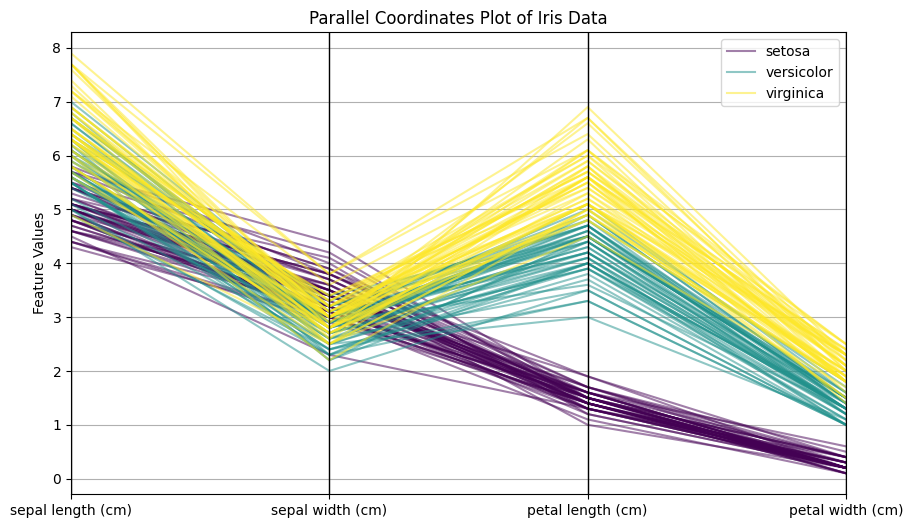

In [214]:
import pandas as pd
from sklearn.datasets import load_iris
from pandas.plotting import parallel_coordinates
import matplotlib.pyplot as plt

# iris 데이터 불러오기
iris = load_iris()
df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)
df_iris['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# 평행좌표 플롯 그리기
plt.figure(figsize=(10, 6))
parallel_coordinates(df_iris, 'species', colormap='viridis', alpha=0.5)
plt.title('Parallel Coordinates Plot of Iris Data')
plt.ylabel('Feature Values')
plt.grid(True)
plt.show()

In [ ]:
pd.read_csv('data/')

In [6]:
df_books = pd.read_csv('data/moovi.csv', index_col = 'book_id')

In [15]:
df_books_cnt = df_ratings['book_id'].rename('rating count').value_counts().to_frame().join(
    df_books
)

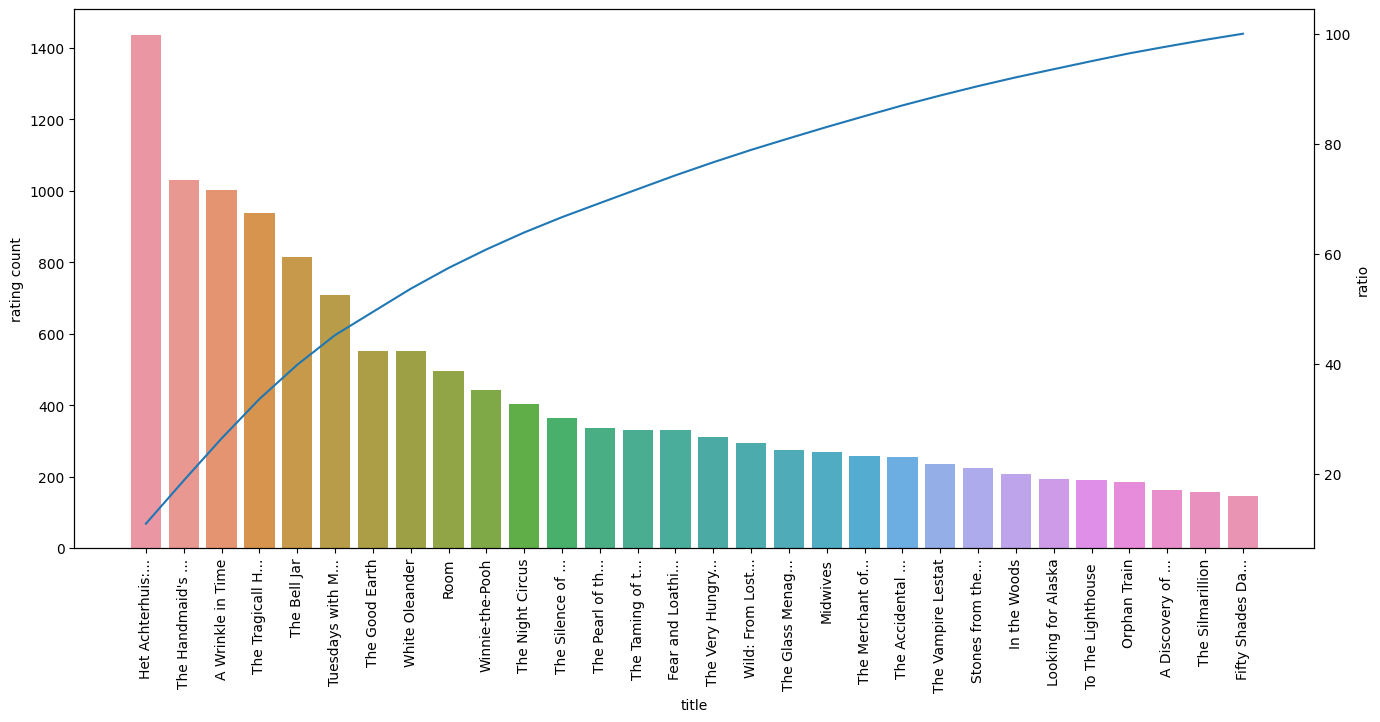

In [44]:
plt.figure(figsize = (16, 7))
df = df_books_cnt.loc[
    df_books_cnt['original_title'].notna()
].pipe(lambda x: x.loc[
    x['original_title'].str.match(r'^[a-zA-Z0-9\s.,!?\'":;()\[\]\-]*$')
]).assign(
    title = lambda x: x['original_title'].apply(lambda x: x[:15] + '...' if len(x) > 18  else x)
).sample(30, random_state = 123).sort_values('rating count', ascending = False).assign(
    ratio = lambda x: x['rating count'].cumsum() / x['rating count'].sum() * 100
)
sns.barplot(
    df, x = 'title', y = 'rating count'
)
# X축 레이블 회전 (예: 45도)
plt.xticks(rotation=90)
sns.lineplot(
    df, x = 'title', y = 'ratio', ax = plt.gca().twinx()
)
plt.show()

In [30]:
df_books_cnt['original_title'].str.match(r'^[a-zA-Z0-9\s.,!?\'":;()\[\]\-]*$')

4       True
2       True
5       True
8       True
28      True
        ... 
1334    True
1675    True
679     True
1055    True
88      True
Name: original_title, Length: 687, dtype: object

In [111]:
df_rainfall = pd.read_csv('data/Rainfall.csv')
df_rainfall = df_rainfall.assign(
    date = lambda x: pd.to_datetime('2024-01-01') + x.index.map(lambda y: pd.Timedelta(days=int(y)))
).rename(
    columns = {'temparature': 'temperature'}
).rename(
    columns = lambda x: x.strip()
)
df_rainfall.head()

,day,pressure,maxtemp,temperature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed,date
0,1,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3,2024-01-01
1,2,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3,2024-01-02
2,3,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2,2024-01-03
3,4,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9,2024-01-04
4,5,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7,2024-01-05


<AxesSubplot:xlabel='date', ylabel='temperature'>

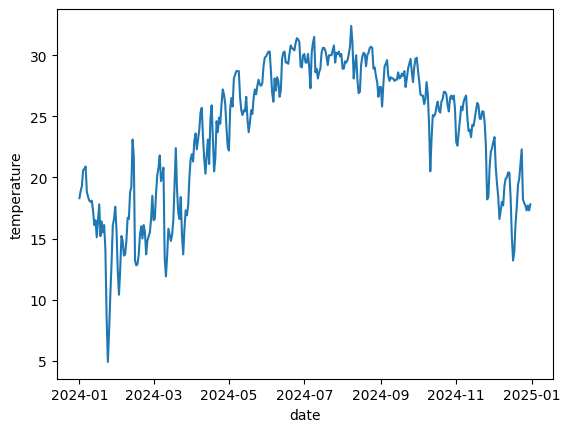

In [77]:
sns.lineplot(
    df_rainfall, x = 'date', y = 'temperature'
)

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed,date
0,1,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3,2024-01-02
1,2,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3,2024-01-03
2,3,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2,2024-01-04
3,4,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9,2024-01-05
4,5,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7,2024-01-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,27,1022.7,18.8,17.7,16.9,15.0,84,90,yes,0.0,30.0,18.4,2024-01-28
362,28,1026.6,18.6,17.3,16.3,12.8,75,85,yes,1.0,20.0,25.9,2024-01-29
363,29,1025.9,18.9,17.7,16.4,13.3,75,78,yes,4.6,70.0,33.4,2024-01-30
364,30,1025.3,19.2,17.3,15.2,13.3,78,86,yes,1.2,20.0,20.9,2024-01-31


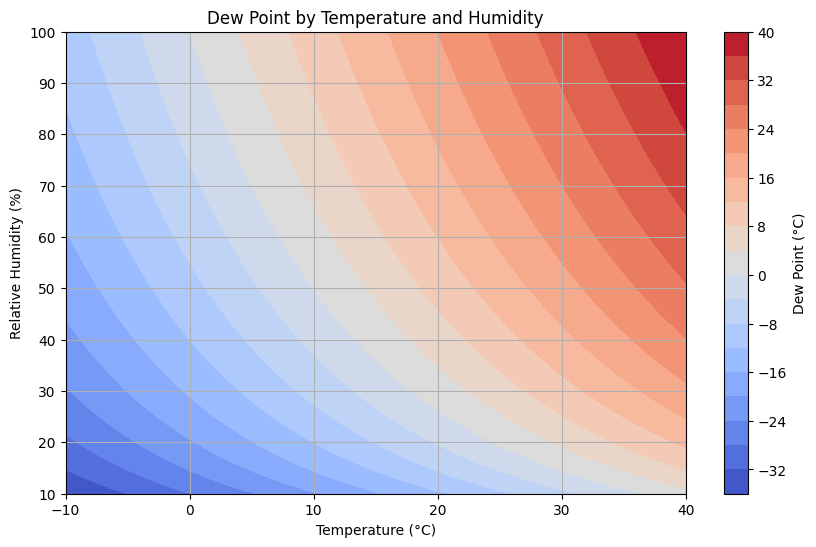

In [79]:
# 이슬점 계산 함수
def calculate_dew_point(temp, rh):
    a = 17.62
    b = 243.12
    gamma = (a * temp) / (b + temp) + np.log(rh / 100.0)
    dew_point = (b * gamma) / (a - gamma)
    return dew_point

# 기온과 습도 범위 설정
temp_range = np.linspace(-10, 40, 100)  # -10°C to 40°C
rh_range = np.linspace(10, 100, 100)    # 10% to 100%

T, RH = np.meshgrid(temp_range, rh_range)
DewPoint = calculate_dew_point(T, RH)

# 등고선 그래프 그리기
plt.figure(figsize=(10, 6))
contour = plt.contourf(T, RH, DewPoint, cmap='coolwarm', levels=20)
cbar = plt.colorbar(contour)
cbar.set_label('Dew Point (°C)')

plt.title('Dew Point by Temperature and Humidity')
plt.xlabel('Temperature (°C)')
plt.ylabel('Relative Humidity (%)')
plt.grid(True)
plt.show()

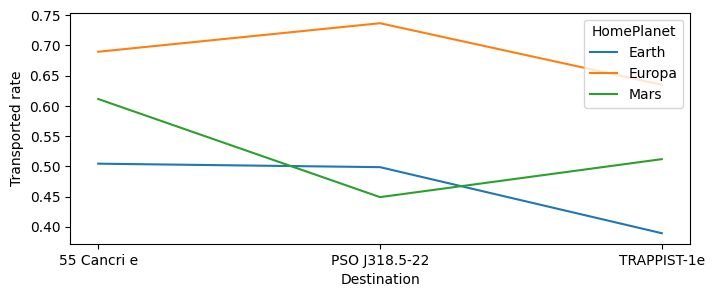

In [101]:
plt.figure(figsize = (8, 3))
df_transported = df_space.groupby(['HomePlanet', 'Destination'], as_index = False)['Transported'].mean().rename(
    columns = {'Transported': 'Transported rate'}
)
sns.lineplot(df_transported, x = 'Destination', y ='Transported rate', hue = 'HomePlanet')
plt.show()

In [207]:
df_titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [211]:
df_survived = df_titanic.groupby(['Pclass', 'Sex'], as_index = False)['Survived'].mean().rename(
    columns = {'Survived': 'Survived rate'}
)

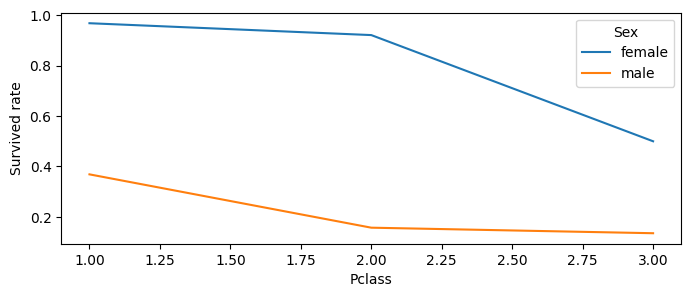

In [213]:
plt.figure(figsize = (8, 3))
sns.lineplot(df_survived, x = 'Pclass', y ='Survived rate', hue = 'Sex')
plt.show()

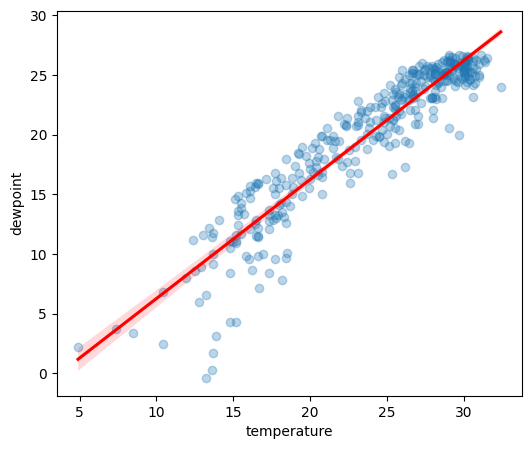

In [203]:
plt.figure(figsize = (6, 5))
sns.regplot(
    df_rainfall, x = 'temperature', y = 'dewpoint', scatter_kws={'alpha': 0.3},   # 산점도 투명도
    line_kws={'color': 'red'}     # 추세선 색
)
plt.show()

In [110]:
df_rainfall.columns

Index(['day', 'pressure ', 'maxtemp', 'temperature', 'mintemp', 'dewpoint',
       'humidity ', 'cloud ', 'rainfall', 'sunshine', '         winddirection',
       'windspeed', 'date'],
      dtype='object')

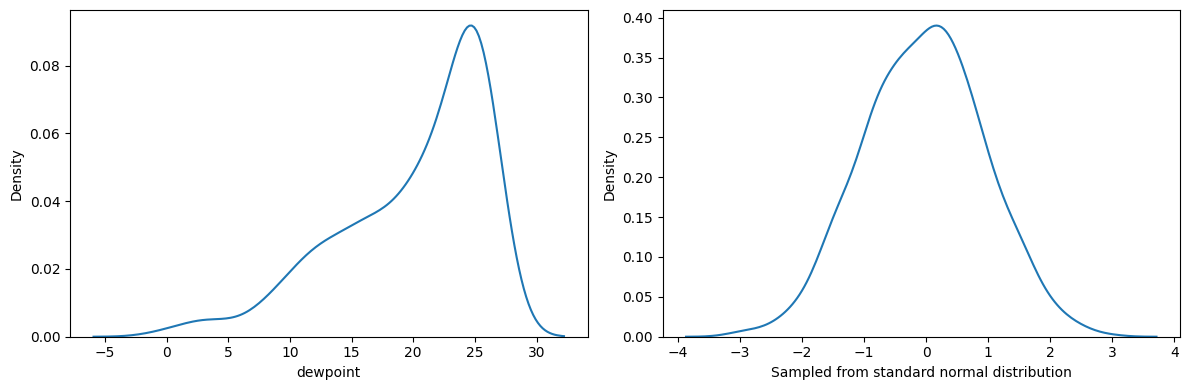

In [138]:
from scipy.stats import norm
fig, axes = plt.subplots(1, 2, figsize = (12, 4))
sns.kdeplot(df_rainfall, x = 'dewpoint', ax = axes[0])
s_z = pd.Series(norm.rvs(size=1000)).rename('Sampled from standard normal distribution')
sns.kdeplot(s_z, ax = axes[1])
plt.tight_layout()
plt.show()

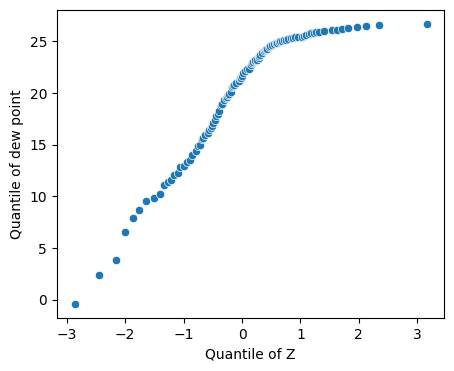

In [155]:
q = np.linspace(0, 1, 101)
plt.figure(figsize = (5, 4))
sns.scatterplot(
    y = df_rainfall['dewpoint'].quantile(q).rename('Quantile of dew point'), x = s_z.quantile(q).rename('Quantile of Z')
)
plt.show()

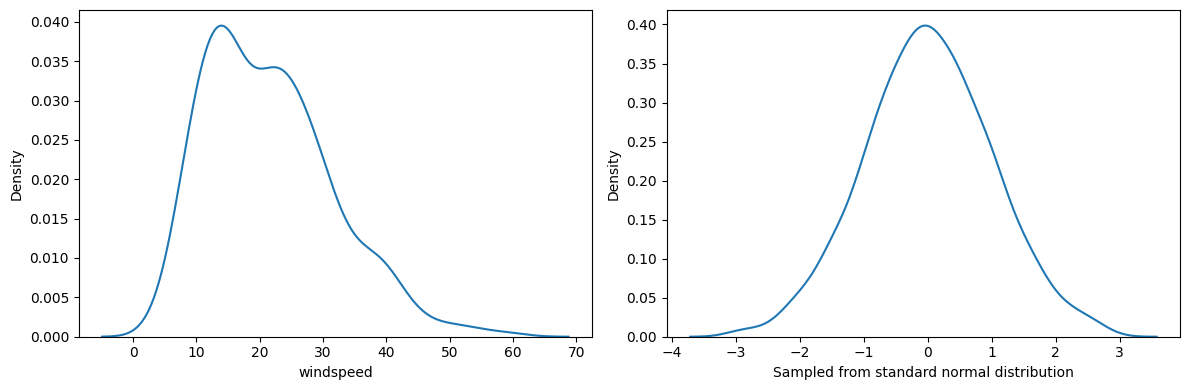

In [140]:
from scipy.stats import norm
fig, axes = plt.subplots(1, 2, figsize = (12, 4))
sns.kdeplot(df_rainfall, x = 'windspeed', ax = axes[0])
s_z = pd.Series(norm.rvs(size=1000)).rename('Sampled from standard normal distribution')
sns.kdeplot(s_z, ax = axes[1])
plt.tight_layout()
plt.show()

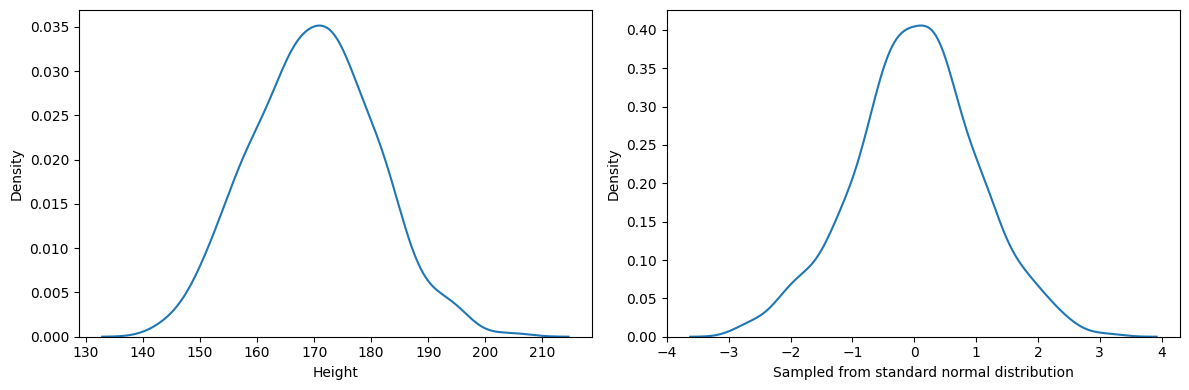

In [144]:
from scipy.stats import norm
fig, axes = plt.subplots(1, 2, figsize = (12, 4))
s_t = pd.Series(norm.rvs(size = 300, loc = 170, scale = 10), name = 'Height')
sns.kdeplot(s_t, ax = axes[0])
s_z = pd.Series(norm.rvs(size=1000)).rename('Sampled from standard normal distribution')
sns.kdeplot(s_z, ax = axes[1])
plt.tight_layout()
plt.show()

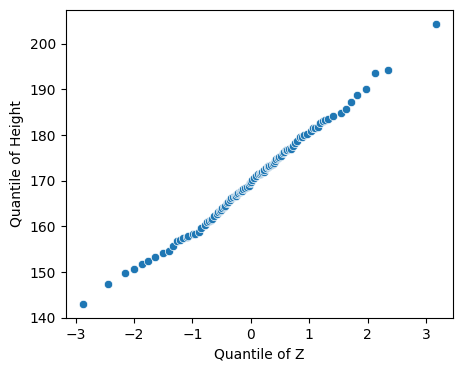

In [153]:
q = np.linspace(0, 1, 101)
plt.figure(figsize = (5, 4))
sns.scatterplot(
    y = s_t.quantile(q).rename('Quantile of Height'), x = s_z.quantile(q).rename('Quantile of Z')
)
plt.show()

In [157]:
df_space

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [ ]:
from scipy.stats import norm
fig, axes = plt.subplots(1, 2, figsize = (12, 4))
sns.kdeplot(df_rainfall, x = 'dewpoint', ax = axes[0])
s_z = pd.Series(norm.rvs(size=1000)).rename('Sampled from standard normal distribution')
sns.kdeplot(s_z, ax = axes[1])
plt.tight_layout()
plt.show()

In [ ]:
q = np.linspace(0, 1, 101)
plt.figure(figsize = (5, 4))
sns.scatterplot(
    y = df_rainfall['windspeed'].quantile(q).rename('Quantile of windspeed'), x = s_z.quantile(q).rename('Quantile of Z')
)
plt.show()

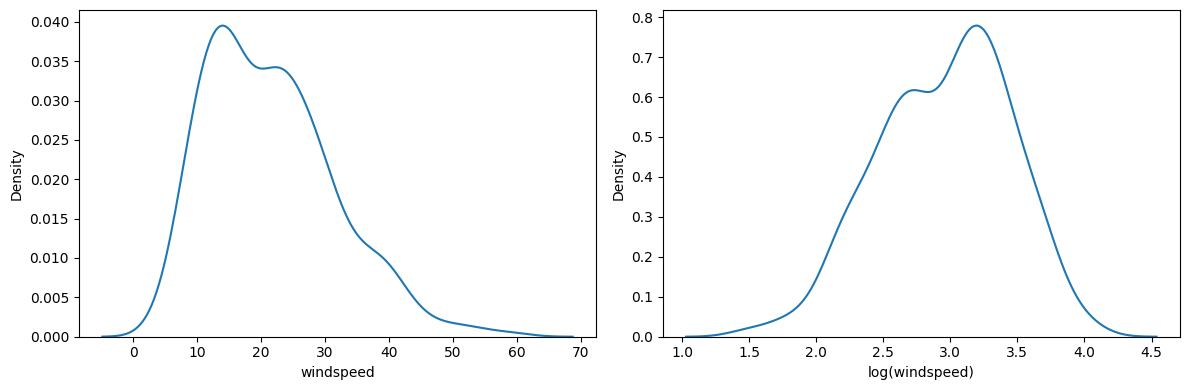

In [225]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.kdeplot(
    df_rainfall['windspeed'], ax = axes[0]
)
sns.kdeplot(
    np.log(df_rainfall['windspeed']).rename('log(windspeed)'), ax = axes[1]
)
plt.tight_layout()
plt.show()

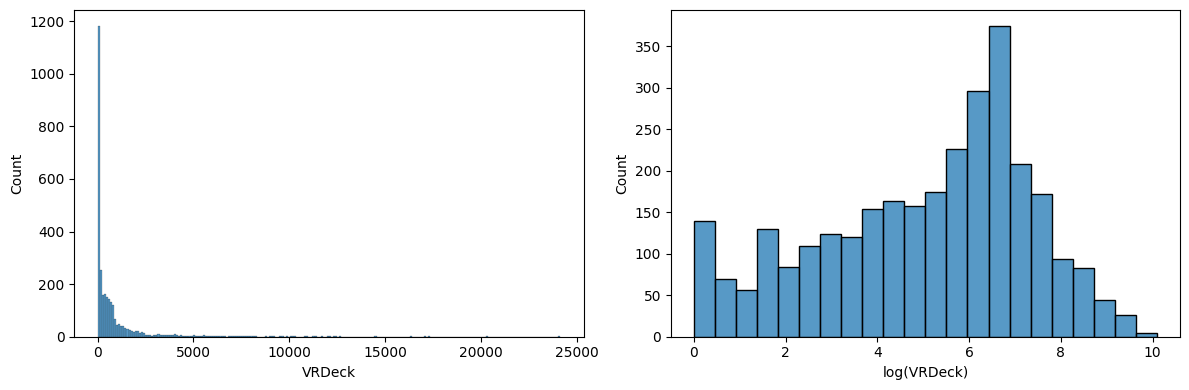

In [273]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.histplot(
    df_space.query('VRDeck > 0')['VRDeck'], ax = axes[0]
)
sns.histplot(
     np.log(df_space.query('VRDeck > 0')['VRDeck']).rename('log(VRDeck)'), ax = axes[1]
)
plt.tight_layout()
plt.show()

In [260]:
df_abalone = pd.read_csv('data/abalone.csv')
df_abalone

,Sex,Length,Diameter,Height,Whole,Shucked,Viscera,Shell,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [244]:
df_abalone = df_abalone.assign(
    Volumn = lambda x: x['Length'] * x['Diameter'] * x['Height']
).rename(columns = {'Whole': 'Weight'})

In [248]:
df_simple_abalone = df_abalone[['Weight', 'Volumn', 'Rings']]

<AxesSubplot:xlabel='Weight', ylabel='Volumn'>

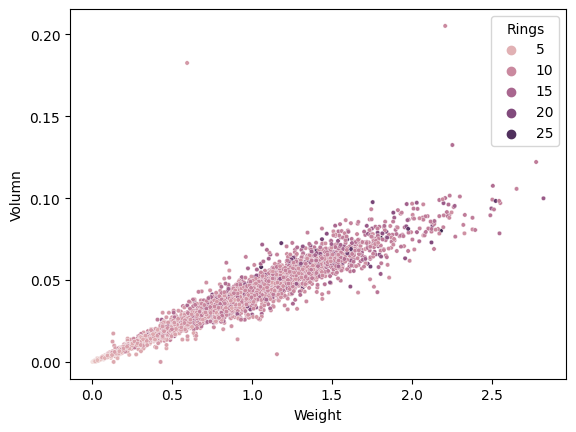

In [256]:
sns.scatterplot(
    df_simple_abalone, x = 'Weight', y = 'Volumn', hue = 'Rings', s = 10
)

In [251]:
import statsmodels.api as sm

# 1. 종속 변수(Y)와 독립 변수(X) 정의
X = df_simple_abalone[['Weight', 'Volumn']]
y = df_simple_abalone['Rings']

# 2. 상수항 추가 (절편 포함)
X = sm.add_constant(X)

# 3. 회귀 모델 적합
model = sm.OLS(y, X).fit()

# 4. 회귀 결과 요약 출력
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Rings   R-squared:                       0.301
Model:                            OLS   Adj. R-squared:                  0.300
Method:                 Least Squares   F-statistic:                     897.8
Date:                Mon, 14 Jul 2025   Prob (F-statistic):               0.00
Time:                        15:54:19   Log-Likelihood:                -10069.
No. Observations:                4177   AIC:                         2.014e+04
Df Residuals:                    4174   BIC:                         2.016e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9688      0.082     84.996      0.000       6.808       7.130
Weight         1.4467      0.303      4.768      0.000       0.852       2.042
Volumn        50.8684      7.034      7.231      0.000      37.077      64.660
==============================================================================
Omnibus:                     1245.471   Durbin-Watson:                   0.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3712.236
Skew:                           1.543   Prob(JB):                         0.00
Kurtosis:                       6.436   Cond. No.                         226.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

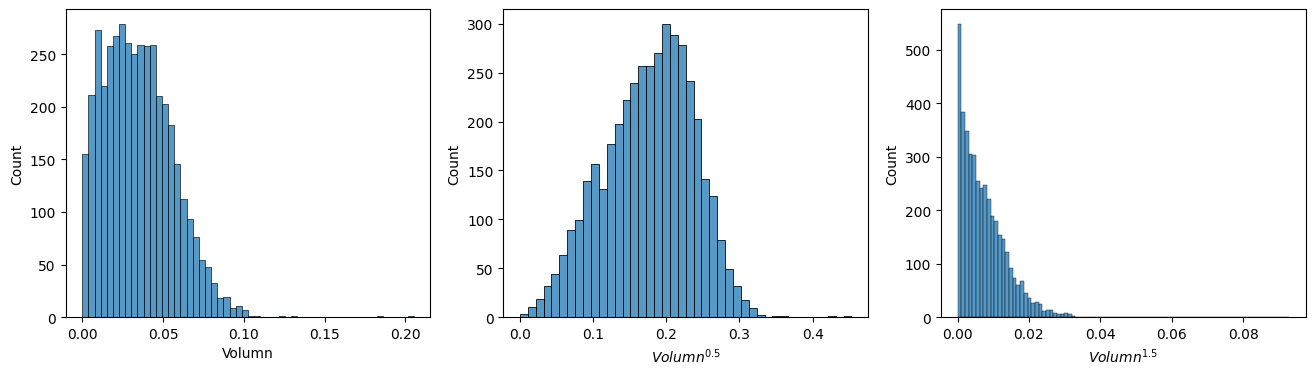

In [296]:
fig, axes = plt.subplots(1, 3, figsize = (16, 4))
sns.histplot(
    df_simple_abalone['Volumn'], ax = axes[0]
)
sns.histplot(
    (df_simple_abalone['Volumn'] ** 0.5).rename('$Volumn^{0.5}$'), ax = axes[1]
)
sns.histplot(
    (df_simple_abalone['Volumn'] ** 1.5).rename('$Volumn^{1.5}$'), ax = axes[2]
)
plt.show()

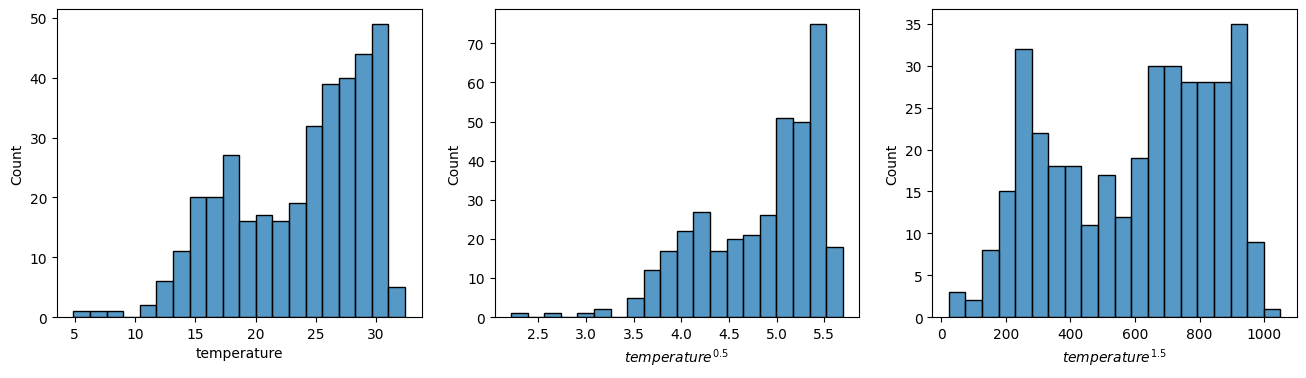

In [299]:
fig, axes = plt.subplots(1, 3, figsize = (16, 4))
sns.histplot(
    df_rainfall['temperature'], ax = axes[0], bins = 20
)
sns.histplot(
    (df_rainfall['temperature'] ** 0.5).rename('$temperature^{0.5}$'), ax = axes[1], bins = 20
)
sns.histplot(
    (df_rainfall['temperature'] ** 2.0).rename('$temperature^{1.5}$'), ax = axes[2], bins = 20
)
plt.show()

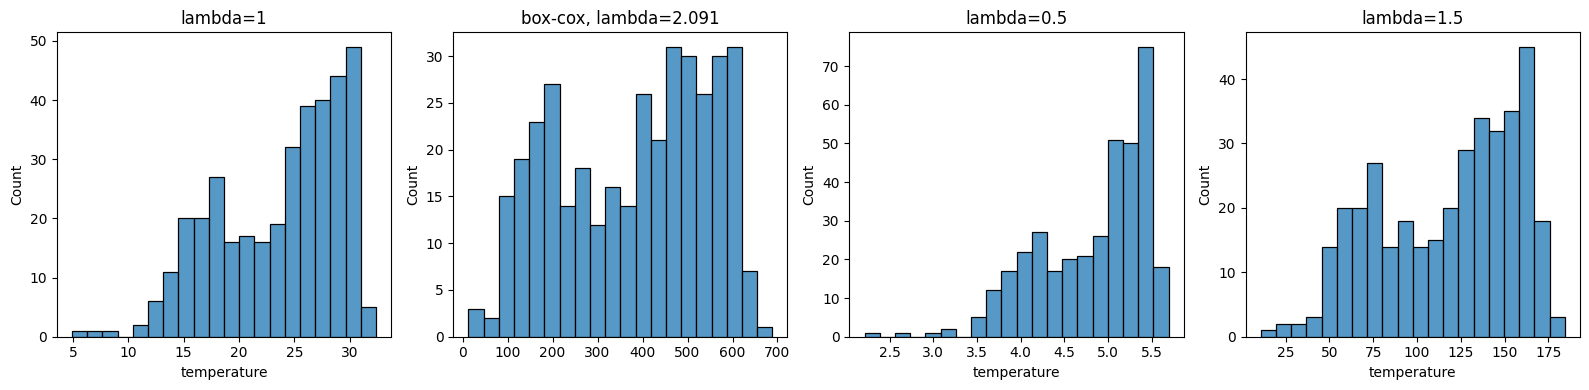

In [310]:
from sklearn.preprocessing import PowerTransformer
fig, axes = plt.subplots(1, 4, figsize=(16, 4))
lams = [1, 'box-cox',  0.5, 1.5]
pt = PowerTransformer(method='box-cox', standardize=False)
s = df_rainfall['temperature']
for lam, ax in zip(lams, axes.flatten()):
    if lam =='box-cox':
        sns.histplot(pt.fit_transform(s.to_frame())[:, 0], ax=ax, bins=20)
        ax.set_title('box-cox, lambda={:.5}'.format(pt.lambdas_[0]))
    elif lam != 0:
        sns.histplot(s ** lam, ax=ax, bins=20)
        ax.set_title('lambda={}'.format(lam))
    else:
        sns.histplot(np.log(s_age), ax=ax, bins=20)
        ax.set_title('lambda={}'.format(lam))
plt.tight_layout()
plt.show()

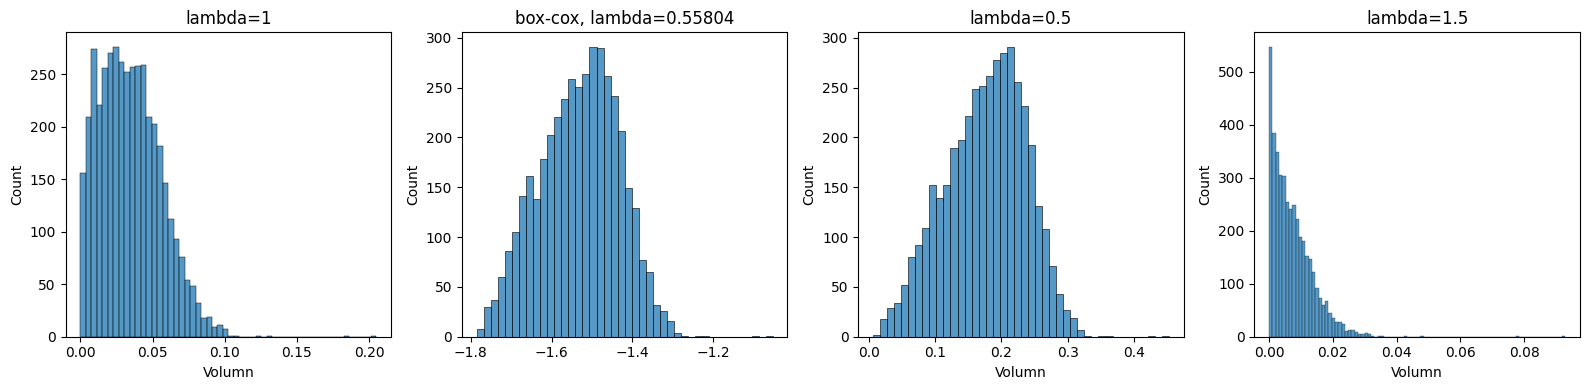

In [308]:
from sklearn.preprocessing import PowerTransformer
fig, axes = plt.subplots(1, 4, figsize=(16, 4))
lams = [1, 'box-cox',  0.5, 1.5]
pt = PowerTransformer(method='box-cox', standardize=False)
s = df_simple_abalone['Volumn'].pipe(lambda x: x.loc[x > 0])
for lam, ax in zip(lams, axes.flatten()):
    if lam =='box-cox':
        sns.histplot(pt.fit_transform(s.to_frame())[:, 0], ax=ax)
        ax.set_title('box-cox, lambda={:.5}'.format(pt.lambdas_[0]))
    elif lam != 0:
        sns.histplot(s ** lam, ax=ax)
        ax.set_title('lambda={}'.format(lam))
    else:
        sns.histplot(np.log(s_age), ax=ax)
        ax.set_title('lambda={}'.format(lam))
plt.tight_layout()
plt.show()

In [302]:
from sklearn.preprocessing import PowerTransformer
fig, axes = plt.subplots(1, 4, figsize=(16, 4))
lams = [1, 'box-cox',  0.5, 1.5]
pt = PowerTransformer(method='box-cox', standardize=False)
s = df_rainfall['temperature']
for lam, ax in zip(lams, axes.flatten()):
    if lam =='box-cox':
        sns.histplot(pt.fit_transform(s.to_frame())[:, 0], ax=ax)
        ax.set_title('box-cox, lambda={:.5}'.format(pt.lambdas_[0]))
    elif lam != 0:
        sns.histplot(s ** lam, ax=ax)
        ax.set_title('lambda={}'.format(lam))
    else:
        sns.histplot(np.log(s_age), ax=ax)
        ax.set_title('lambda={}'.format(lam))
plt.tight_layout()
plt.show()

In [240]:
from scipy.stats import chi2_contingency
df_space[['HomePlanet', 'Destination']].pivot_table(index = 'HomePlanet', columns = 'Destination', aggfunc='size').pipe(
    lambda x: x / x.sum()
)

Destination,55 Cancri e,PSO J318.5-22,TRAPPIST-1e
HomePlanet,,,
Earth,0.390051,0.912821,0.537901
Europa,0.500848,0.024359,0.206245
Mars,0.109101,0.062821,0.255854


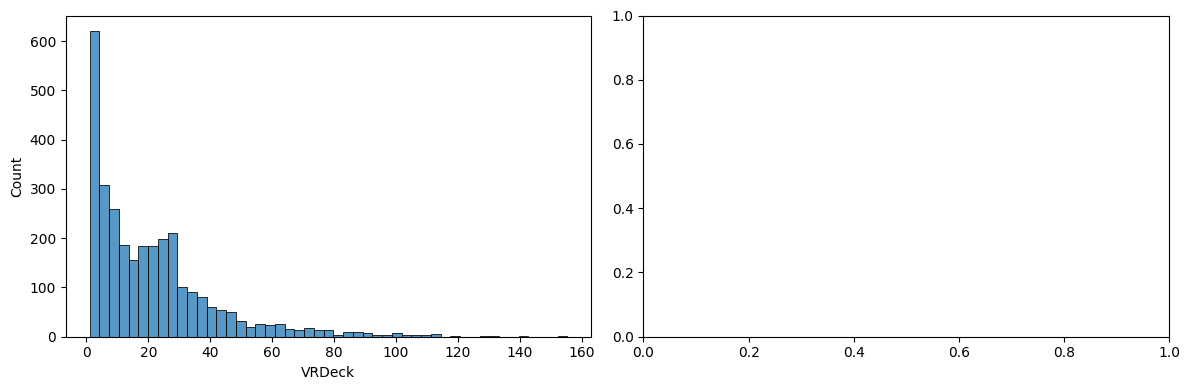

In [272]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.histplot(
    df_space.query('VRDeck > 0')['VRDeck'] ** 0.5, ax = axes[0]
)
plt.tight_layout()
plt.show()

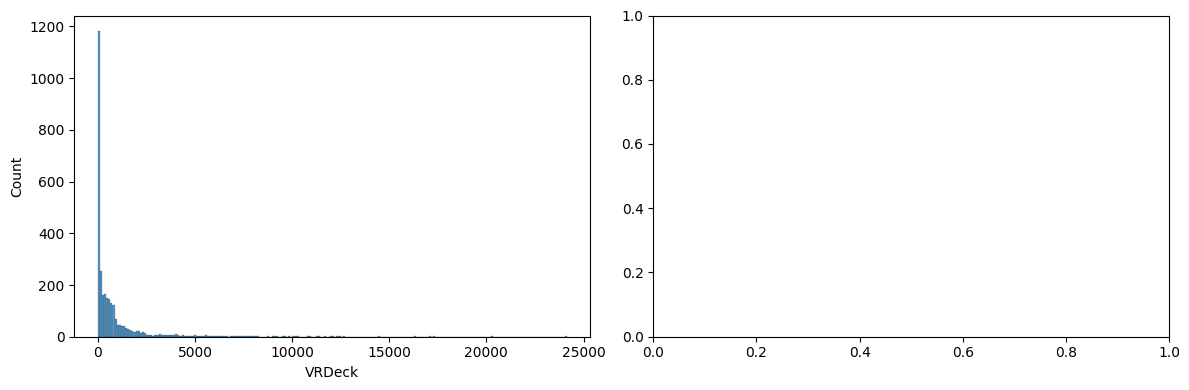

In [271]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.histplot(
    df_space.query('VRDeck > 0')['VRDeck'], ax = axes[0]
)
plt.tight_layout()
plt.show()

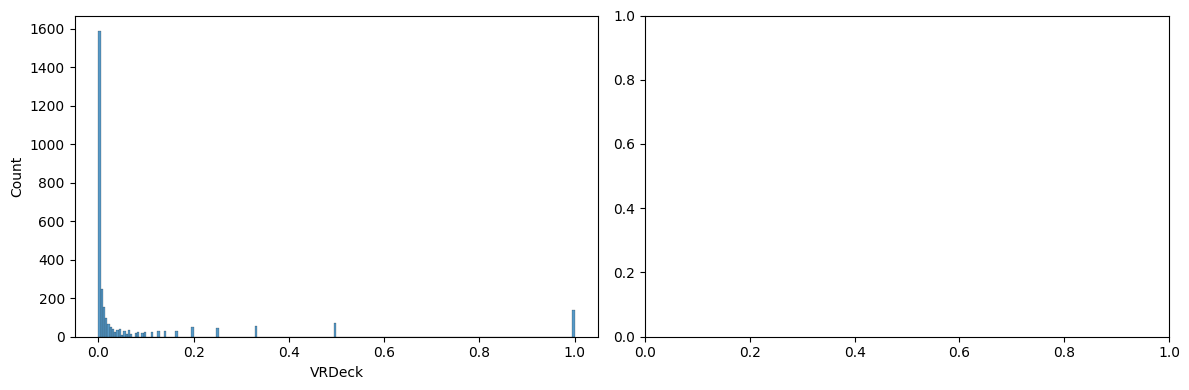

In [270]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.histplot(
    df_space.query('VRDeck > 0')['VRDeck'] ** -1, ax = axes[0]
)
plt.tight_layout()
plt.show()

In [311]:
df_space

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Cabin Deck,Cabin Num,Cabin Side
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0.0,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0.0,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,0.0,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,0.0,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,1.0,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,A,98.0,P
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,G,1499.0,S
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,G,1500.0,S
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,E,608.0,S
